### Create bboxs

We create bboxes automatically (by setting size of bbox for each type of defect). Here we create such bboxes

In [3]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageDraw, ImageFont

In [4]:
root = Path('/home/ezhur/datasets/projects/hakaton_pipes/dataset_namings/imgs')
df_path = './df_pipe_paths.csv'

IMG_HEIGHT = 600
IMG_WIDTH = 960

In [5]:
# read df
df = pd.read_csv(df_path, index_col=0)
df

,path,x,y,class,new_path,type_defect,importance_defect,name_defect
0,0/1538/frame0006.bmp,809.0,336.0,3.0,1.jpg,1.0,1.0,crack_1
1,0/1538/frame0007.bmp,667.0,318.0,3.0,2.jpg,1.0,1.0,crack_1
2,0/1538/frame0007.bmp,811.0,523.0,3.0,2.jpg,1.0,1.0,crack_1
3,0/1538/frame0009.bmp,576.0,313.0,3.0,3.jpg,1.0,1.0,crack_1
4,0/1538/frame0009.bmp,724.0,509.0,3.0,3.jpg,1.0,1.0,crack_1
...,...,...,...,...,...,...,...,...
34539,2020.10.25/3_495.bmp,NaN,NaN,NaN,8703_no_def.jpg,NaN,NaN,NaN
34540,0/414/frame0003.bmp,NaN,NaN,NaN,8704_no_def.jpg,NaN,NaN,NaN
34541,0/2070/frame0000.bmp,NaN,NaN,NaN,8705_no_def.jpg,NaN,NaN,NaN
34542,0/mv_1/frame0011.bmp,NaN,NaN,NaN,8706_no_def.jpg,NaN,NaN,NaN


In [225]:
# sizes of bboxes per class of defect
bbox_size_dict = {1: [60, 150], 2:[60, 200], 3: [60, 80], 4: [160, 160],
                  5: [60, 160], 6: [80, 80], 7: [80, 80], 8: [60, 60], 
                  9:[60, 60], 10: [180, 180], 11: [130, 130], 12: [180, 60], 13:[60, 150]}
cls_add_bb = list(bbox_size_dict.keys())

#### 1. Visualization

In [224]:
def get_img_with_bbox(df, img_name, img):
    """Adds bbox to img for defects of classes 1-13"""
    # paste img on a white background
    bgd_img = Image.new('RGB', (IMG_WIDTH+100, IMG_HEIGHT+100), (255, 255, 255))
    bgd_img.paste(img, (0, 0)) 

    # find bboxes corresponding to given image
    df_slice = df[df['new_path'] == img_name]

    draw = ImageDraw.Draw(bgd_img)

    # draw marks on image
    # font = ImageFont.truetype("arial.ttf", 16
    font = ImageFont.truetype("Ubuntu-R.ttf", 30)
    for index, row in df_slice.iterrows():
        x = row['x']
        y = row['y']
        cl = row['class']
        if np.isnan(x):
            continue
        cl = int(cl)
        if cl == 0: # no defect
            continue
        else:
            if cl in cls_add_bb:
                w, h = bbox_size_dict[cl]
                draw.rectangle((x-w//2, y-h//2, x+w//2, y+h//2), outline ='red')
                draw.text((x, IMG_HEIGHT+10), str(int(cl)), fill="red", font=font) 
                draw.text((IMG_WIDTH+10, y), str(int(cl)), fill="red", font=font) 
            else:
                draw.ellipse((x-20, y-20, x+20, y+20), outline ='blue')
                draw.text((x, IMG_HEIGHT+10), str(int(cl)), fill="blue", font=font) 
                draw.text((IMG_WIDTH+10, y), str(int(cl)), fill="blue", font=font) 
    return bgd_img


def plot_class_samples(df, class_num, sample_size=40):
    """Plot random sample of images with given defect type"""
    img_pathes = df[df['class'] == class_num]['new_path'].drop_duplicates().values
    # img_pathes = [p[:-4]+'_marked.jpg' for p in img_pathes]
    img_pathes = list(img_pathes)
    img_pathes_sample = random.sample(img_pathes, sample_size)

    for p in img_pathes_sample:
        path = root / p
        img = Image.open(path)
        
        bgd_img = get_img_with_bbox(df, p, img)
        plt.imshow(bgd_img)
        plt.show()

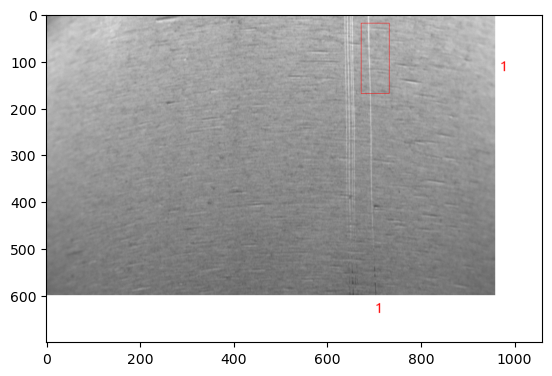

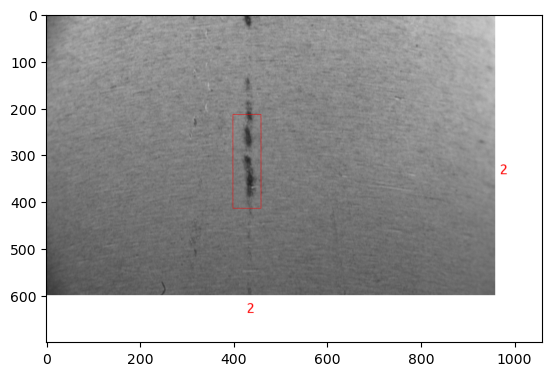

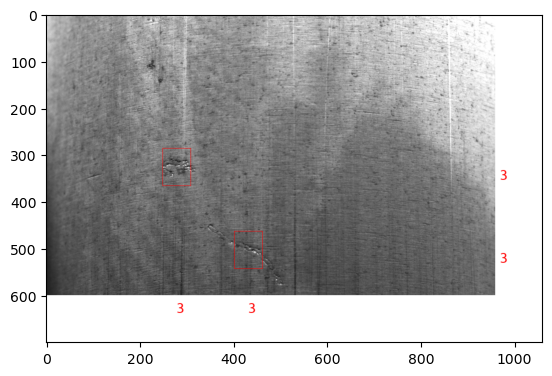

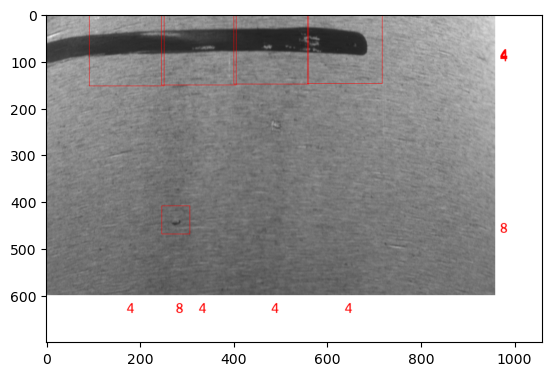

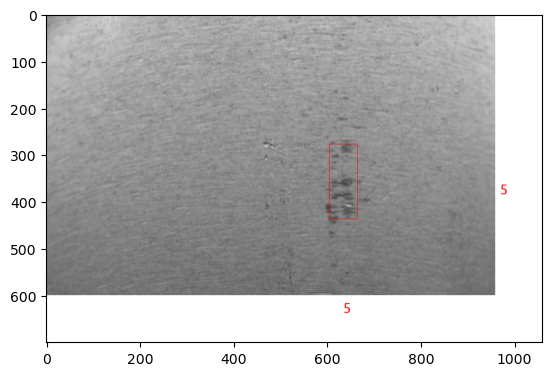

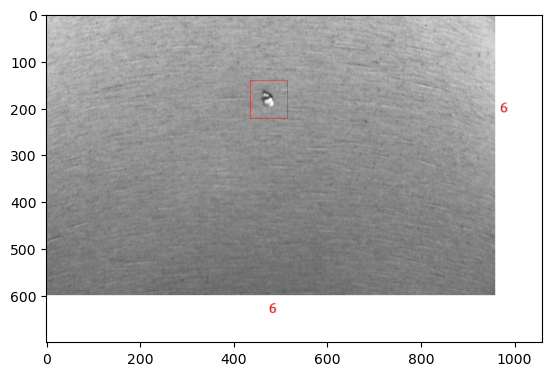

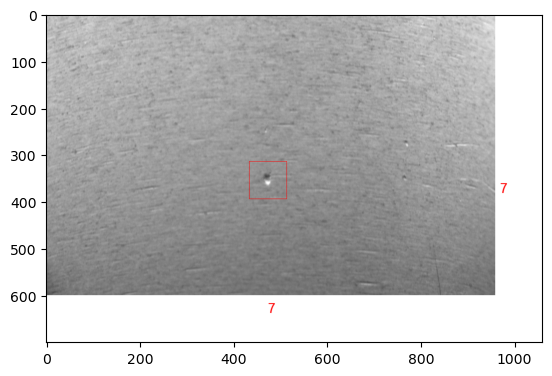

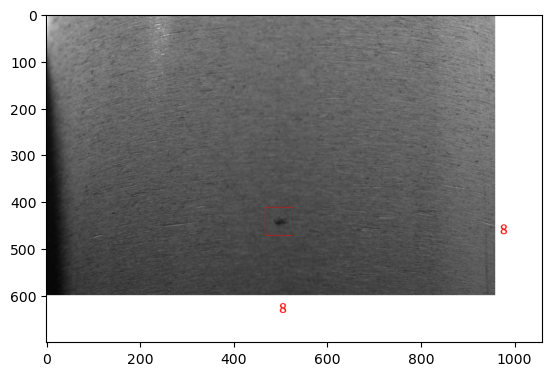

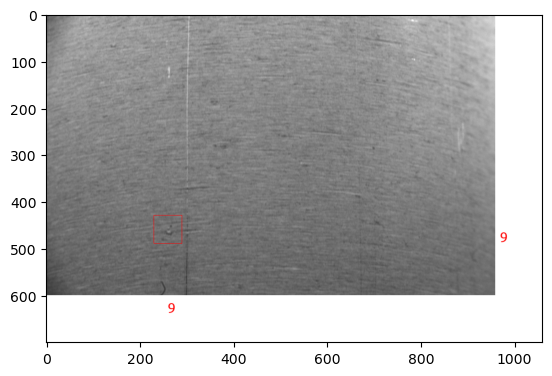

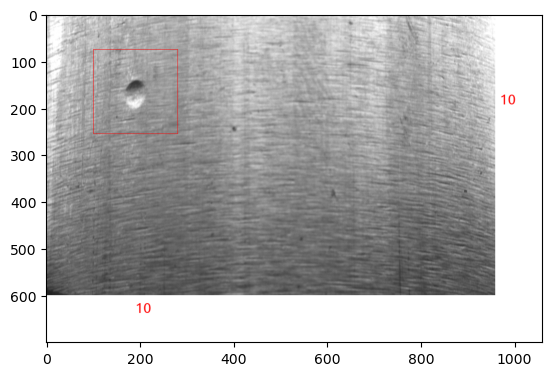

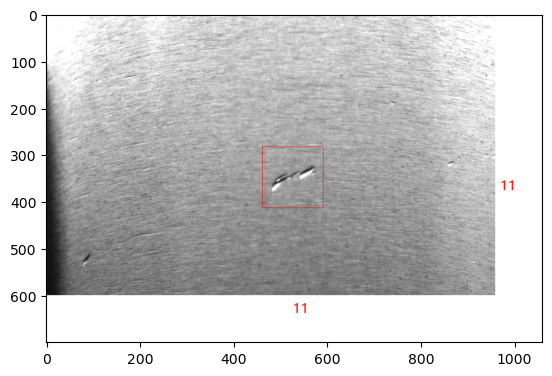

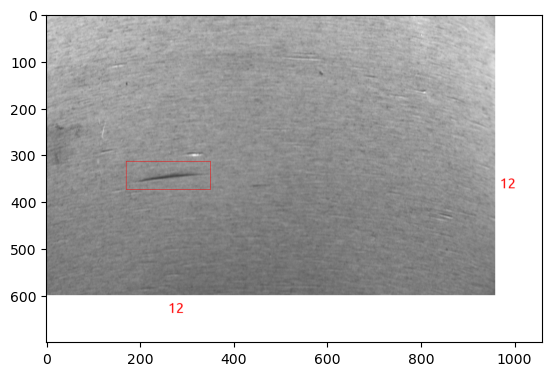

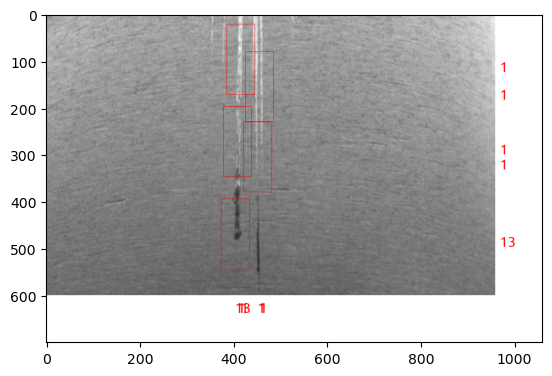

In [227]:
plot_class_samples(df, class_num=1, sample_size=1)
plot_class_samples(df, class_num=2, sample_size=1)
plot_class_samples(df, class_num=3, sample_size=1)
plot_class_samples(df, class_num=4, sample_size=1)
plot_class_samples(df, class_num=5, sample_size=1)
plot_class_samples(df, class_num=6, sample_size=1)
plot_class_samples(df, class_num=7, sample_size=1)
plot_class_samples(df, class_num=8, sample_size=1)
plot_class_samples(df, class_num=9, sample_size=1)
plot_class_samples(df, class_num=10, sample_size=1)
plot_class_samples(df, class_num=11, sample_size=1)
plot_class_samples(df, class_num=12, sample_size=1)
plot_class_samples(df, class_num=13, sample_size=1)

#### 2. Add bboxes to dataframe

In [228]:
df

,path,x,y,class,new_path,type_defect,importance_defect,name_defect
0,0/1538/frame0006.bmp,809.0,336.0,3.0,1.jpg,1.0,1.0,crack_1
1,0/1538/frame0007.bmp,667.0,318.0,3.0,2.jpg,1.0,1.0,crack_1
2,0/1538/frame0007.bmp,811.0,523.0,3.0,2.jpg,1.0,1.0,crack_1
3,0/1538/frame0009.bmp,576.0,313.0,3.0,3.jpg,1.0,1.0,crack_1
4,0/1538/frame0009.bmp,724.0,509.0,3.0,3.jpg,1.0,1.0,crack_1
...,...,...,...,...,...,...,...,...
34539,2020.10.25/3_495.bmp,NaN,NaN,NaN,8703_no_def.jpg,NaN,NaN,NaN
34540,0/414/frame0003.bmp,NaN,NaN,NaN,8704_no_def.jpg,NaN,NaN,NaN
34541,0/2070/frame0000.bmp,NaN,NaN,NaN,8705_no_def.jpg,NaN,NaN,NaN
34542,0/mv_1/frame0011.bmp,NaN,NaN,NaN,8706_no_def.jpg,NaN,NaN,NaN


In [229]:
def get_bbox(x_center, y_center, cls):
    if np.isnan(cls):
        return np.nan, np.nan, np.nan, np.nan
    cls = int(cls)
    
    # class of defect for which we cant automatically calculate bbox 
    if cls not in cls_add_bb:
        return np.nan, np.nan, np.nan, np.nan
    
    w, h = bbox_size_dict[cls]
    x_min = x_center - w//2 
    x_min = max(0, x_min)

    y_min = y_center - h//2
    y_min = max(0, y_min)

    x_max = x_center + w//2
    x_max = min(IMG_WIDTH, x_max)

    y_max = y_center + h//2
    y_max = min(IMG_HEIGHT, y_max)
    
    return x_min, y_min, x_max, y_max

In [230]:
# calculate bboxes
df['x_min'], df['y_min'], df['x_max'], df['y_max'] = \
    zip(*df[['x', 'y', 'class']].apply(lambda elem: get_bbox(elem['x'], elem['y'], elem['class']), axis=1))

In [243]:
df[~df['x_min'].isna()] # 10k

,path,x,y,class,new_path,type_defect,importance_defect,name_defect,x_min,y_min,x_max,y_max
0,0/1538/frame0006.bmp,809.0,336.0,3.0,1.jpg,1.0,1.0,crack_1,779.0,296.0,839.0,376.0
1,0/1538/frame0007.bmp,667.0,318.0,3.0,2.jpg,1.0,1.0,crack_1,637.0,278.0,697.0,358.0
2,0/1538/frame0007.bmp,811.0,523.0,3.0,2.jpg,1.0,1.0,crack_1,781.0,483.0,841.0,563.0
3,0/1538/frame0009.bmp,576.0,313.0,3.0,3.jpg,1.0,1.0,crack_1,546.0,273.0,606.0,353.0
4,0/1538/frame0009.bmp,724.0,509.0,3.0,3.jpg,1.0,1.0,crack_1,694.0,469.0,754.0,549.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33572,2023.10.10 804-23-04_1/1_494.bmp,186.0,334.0,7.0,7375.jpg,0.0,1.0,crack_3,146.0,294.0,226.0,374.0
33573,2023.10.10 804-23-04_1/1_832.bmp,767.0,332.0,7.0,7383.jpg,0.0,1.0,crack_3,727.0,292.0,807.0,372.0
33574,2023.10.10 804-23-04_1/4_544.bmp,372.0,62.0,7.0,7468.jpg,0.0,1.0,crack_3,332.0,22.0,412.0,102.0
33575,2023.10.10 804-23-04_1/4_733.bmp,534.0,502.0,7.0,7478.jpg,0.0,1.0,crack_3,494.0,462.0,574.0,542.0


In [151]:
df.to_csv('./df_bboxes.csv', index=0)

#### 3. Conclusions

We have 34k rows in dataset, 7808 imgs total. Among them 10k imgs correspond to real defect. For these 10k we constructed bboxes.